<a href="https://colab.research.google.com/github/DatumLearning/Mediapipe-playlist/blob/main/Pose_Landmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 3.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


In [ ]:
!wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

In [ ]:
!wget -q -O image.jpg https://cdn.pixabay.com/photo/2019/03/12/20/39/girl-4051811_960_720.jpg

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

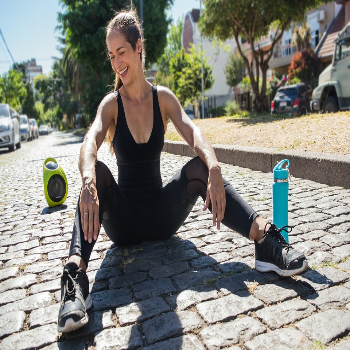

In [ ]:
img = cv2.imread("image.jpg")
img = cv2.resize(img , (350 , 350))
cv2_imshow(img)

In [ ]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [ ]:
base_options = python.BaseOptions(model_asset_path='/content/pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

In [ ]:
image = mp.Image.create_from_file("image.jpg")

In [ ]:
detection_result = detector.detect(image)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
dir(detection_result)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'pose_landmarks',
 'pose_world_landmarks',
 'segmentation_masks']

In [ ]:
img = cv2.imread("/content/image.jpg")
h , w , _ = img.shape

In [ ]:
detection_result.pose_landmarks[0][0]

NormalizedLandmark(x=0.33685022592544556, y=0.1898348033428192, z=-0.14663781225681305, visibility=0.9999998807907104, presence=0.9999998807907104)

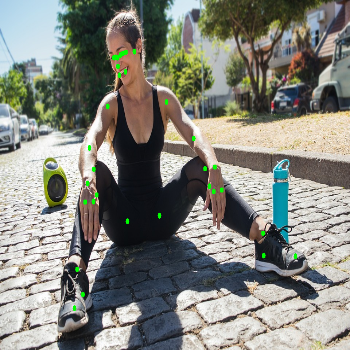

In [ ]:
img = cv2.imread("/content/image.jpg")
for lmarks in detection_result.pose_landmarks[0]:
  x_cord = int(lmarks.x * w)
  y_cord = int(lmarks.y * h)
  img = cv2.circle(img , (x_cord , y_cord) , 5 , (0 , 255 , 0) , -1)
img = cv2.resize(img , (350 , 350))
cv2_imshow(img)

In [ ]:
dir(detection_result.segmentation_masks[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'channels',
 'create_from_file',
 'height',
 'image_format',
 'is_aligned',
 'is_contiguous',
 'is_empty',
 'numpy_view',
 'step',
 'uses_gpu',
 'width']

In [ ]:
detection_result.segmentation_masks[0].numpy_view()

array([[4.7316284e-14, 4.3928772e-14, 4.2196847e-14, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.6469105e-14, 4.2361951e-14, 4.0089236e-14, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.5477958e-14, 4.0505942e-14, 3.8234593e-14, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.2983716e-14, 2.4775746e-13, 5.2297744e-13, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.5776709e-13, 9.2305926e-13, 1.6614841e-12, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [5.5038613e-13, 1.5129511e-12, 2.5764107e-12, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

(array([483709.,   3233.,   2868.,   2766.,   2882.,   2770.,   2933.,
          3135.,   3408., 106696.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

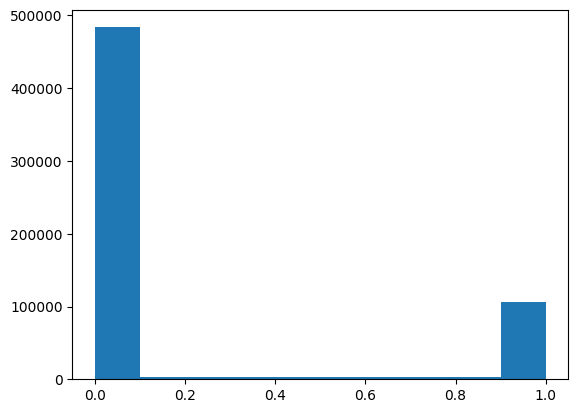

In [ ]:
plt.hist(detection_result.segmentation_masks[0].numpy_view().flatten())

In [ ]:
mask = np.where(detection_result.segmentation_masks[0].numpy_view() > 0.7 , 255 , 0).astype("uint8")

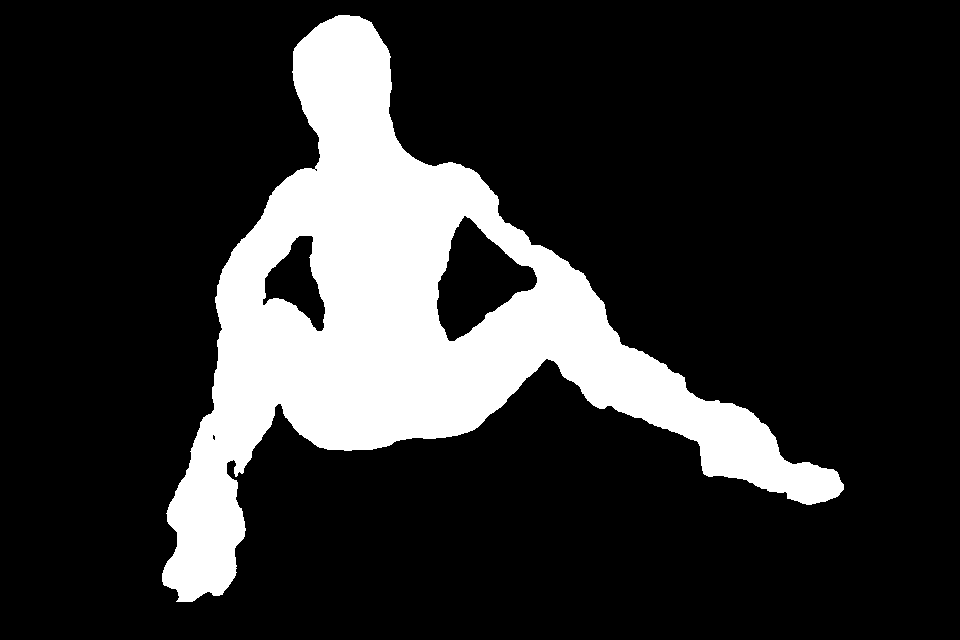

In [ ]:
cv2_imshow(mask)

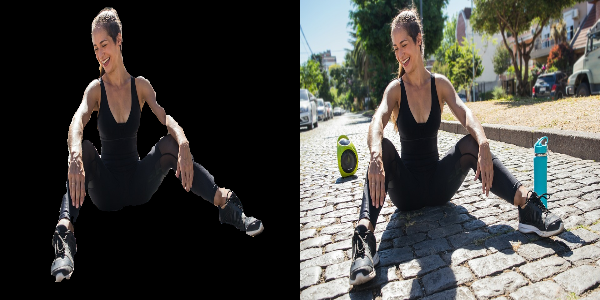

In [ ]:
img = cv2.imread("/content/image.jpg")
result = cv2.bitwise_and(img,img, mask= mask)

masked_img = cv2.resize(result , (300 , 300))

img = cv2.resize(img , (300 , 300))
concatenated_image = np.concatenate((masked_img , img), axis=1)

cv2_imshow(concatenated_image)